## Extracting Data

In [1]:
import numpy as np
import csv
import os
from tqdm import tqdm

NPZ_DIRPATH = "drive/MyDrive/AngioAssessment/npz"
CSV_DIRPATH = "drive/MyDrive/AngioAssessment/csv"

FNAME = 'arr_0'
NUM_FILES = 5

data = []
counts = {"1": 0, "0": 0} # "1" == keyframed

def prep_training_data(npz_fpath, csv_fpath):
  """
  Appends annotations from the csv files to the respective images.
  Function assumes that npz_fpath and csv_fpath are already matched.
  Annotations are in the form of one-hot vectors.

  Counts of keyframe and non-keyframed images are also maintained, to 
  ensure that the input data is sufficiently balanced. 
  """
  csv_data = csv.reader(open(csv_fpath, 'r'))
  npz_data = np.load(npz_fpath)[FNAME]

  for index, anno in tqdm(csv_data):
    try:
      counts[anno] += 1
      data.append([npz_data[int(index)], np.eye(2)[int(anno)]])
    except Exception as e:
      ## not too sure why there is an extra annotation row
      ## TO-DO
      print(e)

def compile_data():
  for i in range(1, 1+NUM_FILES):
    npz_fpath = os.path.join(NPZ_DIRPATH, f"npz-{i}.npz")
    csv_fpath = os.path.join(CSV_DIRPATH, f"csv-{i}.csv")
    prep_training_data(npz_fpath, csv_fpath)

compile_data()

127it [00:00, 565.56it/s]


index 126 is out of bounds for axis 0 with size 126


137it [00:00, 708.24it/s]


index 136 is out of bounds for axis 0 with size 136


175it [00:00, 520.89it/s]


index 174 is out of bounds for axis 0 with size 174


130it [00:00, 533.22it/s]


index 129 is out of bounds for axis 0 with size 129


130it [00:00, 715.08it/s]

index 129 is out of bounds for axis 0 with size 129


## Image Visualisation

The two images below are examples of a keyframed and non-keyframed image respectively. Both images are taken from npz-1.npz.

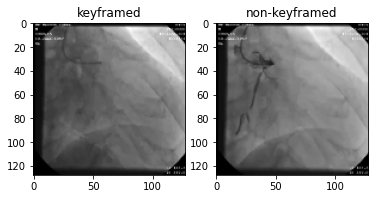

In [20]:
import matplotlib.pyplot as plt

# Extract example of keyframed and non-keyframed data, with reference to csv-1.csv
keyframed_img_eg = data[0]
non_keyframed_img_eg = data[24]

images = list(map(lambda x:x[0][0,:,:], [keyframed_img_eg, non_keyframed_img_eg]))
titles = ["keyframed", "non-keyframed"]

fig, axes = plt.subplots(1, 2)

for i in range(len(images)):
  img = images[i]; title = titles[i]
  axes[i].imshow(img, cmap='gray')
  axes[i].set_title(title)

plt.show()

## Preparing Data

The data can be viewed as unbalanced, as the counts of keyframed and non-keyframed data are not exactly equal:

In [26]:
print(f"Keyframed count: {counts[1]}\nNon-keyframed count: {counts[0]}")

Keyframed count: 300
Non-keyframed count: 399


However, no balancing will be performed for now.

---